In [ ]:
# Importar las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Subir las imágenes desde tu computadora
uploaded = files.upload()

# Verificar los nombres de los archivos subidos
print("Archivos subidos:", uploaded.keys())

# Asegúrate de que los nombres de los archivos coincidan con los nombres que has subido
# En este caso, 'rojo.png', 'verde.png' y 'azul.png' deben coincidir con los archivos cargados
rojo = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)  # Primer archivo cargado
verde = cv2.imread(list(uploaded.keys())[1], cv2.IMREAD_GRAYSCALE)  # Segundo archivo cargado
azul = cv2.imread(list(uploaded.keys())[2], cv2.IMREAD_GRAYSCALE)  # Tercer archivo cargado

# Verificar que las imágenes no están vacías
if rojo is None:
    print("Error: La imagen 'rojo.png' no se ha cargado correctamente.")
if verde is None:
    print("Error: La imagen 'verde.png' no se ha cargado correctamente.")
if azul is None:
    print("Error: La imagen 'azul.png' no se ha cargado correctamente.")

# Si todas las imágenes están cargadas, combinar las imágenes en un solo array RGB
if rojo is not None and verde is not None and azul is not None:
    imagen_rgb = cv2.merge([rojo, verde, azul])

    # Mostrar la imagen combinada
    plt.imshow(imagen_rgb)
    plt.axis('off')  # Para no mostrar los ejes
    plt.show()

Archivos subidos: dict_keys([])


IndexError: list index out of range

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Saving Rainbow.jpg to Rainbow.jpg
Archivos subidos: dict_keys(['Rainbow.jpg'])


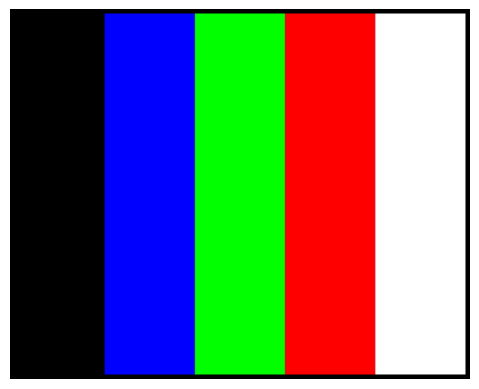

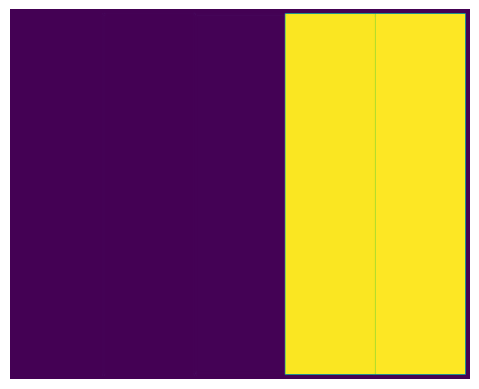

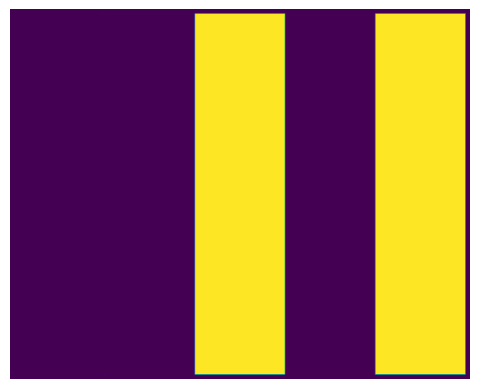

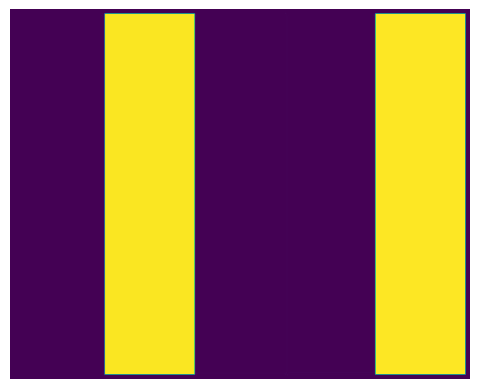

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

# Verificar los nombres de los archivos subidos
print("Archivos subidos:", uploaded.keys())
rgb = np.array(cv2.imread(list(uploaded.keys())[0]))
#print(rgb)
plt.imshow(rgb)
plt.axis('off')  # Para no mostrar los ejes
plt.show()

R = rgb[:,:,0]
plt.imshow(R)
plt.axis('off')  # Para no mostrar los ejes
plt.show()

g = rgb[:,:,1]
plt.imshow(g)
plt.axis('off')  # Para no mostrar los ejes
plt.show()

b = rgb[:,:,2]
plt.imshow(b)
plt.axis('off')  # Para no mostrar los ejes
plt.show()
#print(R)

Saving Rainbow.jpg to Rainbow (7).jpg
Archivos subidos: dict_keys(['Rainbow (7).jpg'])


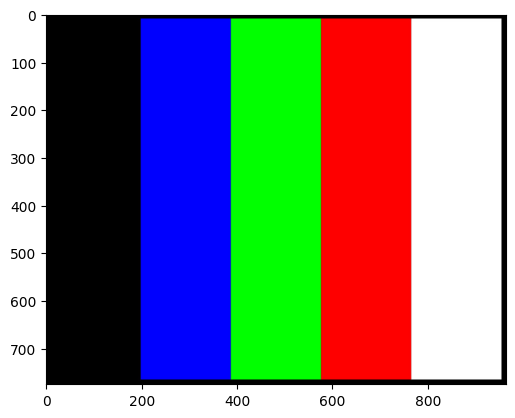

0
0
254


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Subir las imágenes desde tu computadora
uploaded = files.upload()

# Verificar los nombres de los archivos subidos
print("Archivos subidos:", uploaded.keys())
rgb = np.array(cv2.imread(list(uploaded.keys())[0]))
#print(rgb)
plt.imshow(rgb)
plt.axis('on')  # Para no mostrar los ejes
plt.show()

R = rgb[350,350,0]
#plt.imshow(R)
#plt.axis('off')  # Para no mostrar los ejes
#plt.show()

g = rgb[350,350,1]
#plt.imshow(g)
#plt.axis('off')  # Para no mostrar los ejes
#plt.show()

b = rgb[350,350,2]
#plt.imshow(b)
#plt.axis('off')  # Para no mostrar los ejes
#plt.show()
#print(R)
print(R)
print(g)
print(b)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from scipy.optimize import curve_fit

IMAGENES = np.zeros((73, 1024, 1024))

for ii in range(73):
  foto = '/content/drive/MyDrive/MalusSimulado/Theta' + str(5*ii).zfill(3) + 'deg.tif'
  IMAGENES[ii]= cv2.imread( foto, cv2.IMREAD_GRAYSCALE)

unpuntico = IMAGENES[:, 0, 0]
ejex = np.arange(0.0, 2*np.pi + np.pi/180*5 ,np.pi/180*5)

def malus(theta, I0, theta0):
    return I0 * (np.cos(theta - theta0))**2

p0 = [max(unpuntico), 0]  # Valores iniciales de I0 y theta0
popt, pcov = curve_fit(malus, ejex, unpuntico, p0=p0)
I0_fit, theta0_fit = popt

print("I_0 ajustado:", I0_fit)
print("Theta_0 ajustado:", theta0_fit)

plt.figure(figsize=(10,6))
plt.plot(ejex, unpuntico, 'o', label='Datos', alpha=0.7)
theta_fine = np.linspace(0, 2*np.pi, 200)
plt.plot(theta_fine, malus(theta_fine, I0_fit, theta0_fit), '-.', label='Ajuste')
plt.xlabel('Ángulo (rad)')
plt.ylabel('Intensidad')
plt.title('Ajuste de la Ley de Malus')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: array must not contain infs or NaNs

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


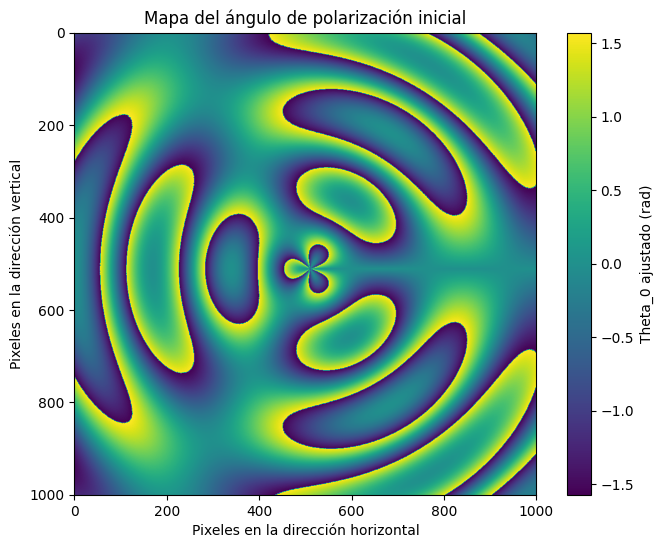

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.optimize import curve_fit

# Montar el drive
drive.mount('/content/drive')

# Carga de imágenes
IMAGENES = np.zeros((73, 1024, 1024))
for ii in range(73):
    foto = '/content/drive/MyDrive/MalusSimulado/Theta' + str(5*ii).zfill(3) + 'deg.tif'
    IMAGENES[ii] = cv2.imread(foto, cv2.IMREAD_GRAYSCALE)

# Definir la región de interés
a, b = 0, 1000  # Rango vertical (ejemplo)
c, d = 0, 1000  # Rango horizontal (ejemplo)

# Extraer sub-bloque (multipuntos)
multipuntos = IMAGENES[:, a:b, c:d]

# Definir el vector de ángulos en radianes
ejex = np.arange(0.0, 2*np.pi + np.pi/180*5, np.pi/180*5)

# Función de Malus
def malus(theta, I0, theta0):
    return I0 * (np.cos(theta - theta0))**2

# Matriz para almacenar los ángulos ajustados
theta_map = np.zeros((b - a, d - c))

# Ajuste en cada punto de la subregión
for i in range(b - a):
    for j in range(d - c):
        # Intensidades para la posición (i, j) en la subregión
        intensidades = multipuntos[:, i, j]

        # Valores iniciales para el ajuste
        p0 = [max(intensidades), 0]

        # Realizar el ajuste
        popt, pcov = curve_fit(malus, ejex, intensidades, p0=p0)
        I0_fit, theta0_fit = popt

        # Guardar el ángulo ajustado en el mapa
        theta_map[i, j] = theta0_fit

# Graficar el mapa de ángulos
plt.figure(figsize=(8,6))
im = plt.imshow(theta_map, extent=[c, d, b, a], origin='upper')
plt.colorbar(im, label='Theta_0 ajustado (rad)')
plt.xlabel('Pixeles en la dirección horizontal')
plt.ylabel('Pixeles en la dirección vertical')
plt.title('Mapa del ángulo de polarización inicial')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


IMAGENES = np.zeros((1024, 1024))
foto = '/content/drive/MyDrive/InterferometroYoung/Young.jpg'
IMAGENES= cv2.imread(foto, cv2.IMREAD_GRAYSCALE)
IMAGENES = IMAGENES/np.max(IMAGENES)

punticos = np.zeros(1024)
for ii in range(500):
  punticos += IMAGENES[:,ii]/500

ejex = np.arange(1024)

muaks, _ = find_peaks(punticos, height=0.5, distance=30)
print(np.size(muaks))
print(muaks)
distancia = np.mean(muaks[1:] - muaks[:-1])
print(distancia)

ceros = np.zeros(np.size(muaks))


# Suponiendo que 'ejex' y 'unpuntico' son los datos de entrada
# Encuentra los picos en los datos 'unpuntico'


plt.xlabel('Ángulo (rad)')
plt.ylabel('Intensidad')
plt.title('Ajuste de la Ley de Malus con Picos Detectados')
plt.plot(ejex, punticos)
plt.plot(muaks, ceros, 'ro')
plt.legend()
plt.show()


Mounted at /content/drive


TypeError: unsupported operand type(s) for /: 'NoneType' and 'NoneType'